## Exploring the Response Variable and Concluding the Initial Exploration

### Package Versions

In [42]:
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

print('The Python version is {}\n'.format(sys.version))
print('The Numpy version is {}\n'.format(np.__version__))
print('The Pandas version is {}\n'.format(pd.__version__))
print('The Matplotlib version is {}\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}\n'.format(sklearn.__version__))

The Python version is 3.8.5 (default, Jul 28 2020, 12:59:40) 
[GCC 9.3.0]

The Numpy version is 1.19.1

The Pandas version is 1.1.0

The Matplotlib version is 3.3.3

The Scikit-Learn version is 0.24.0



### Load cleaned data

In [43]:
df = pd.read_csv('data/default_of_credit_card_clients_cleaned.csv')

Finding the proportion of the positive class:

In [44]:
df.default_payment_next_month.mean()

0.2217971797179718

Number of sample per class:

In [45]:
df.groupby('default_payment_next_month').id.count()

default_payment_next_month
0    20750
1     5914
Name: id, dtype: int64

### Choosing a linear model from Scikit-Learn (linear regression)

In [46]:
model = LogisticRegression()
model

LogisticRegression()

Instantiating with keyword parameters:

In [47]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='auto',
                           n_jobs=None, penalty='l2', random_state=None, solver='warn',
                           tol=0.0001, verbose=0, warm_start=False)
model

LogisticRegression(solver='warn')

Changing default parameter values:

In [48]:
model.C = 0.1
model.solver = 'liblinear'

model

LogisticRegression(C=0.1, solver='liblinear')

### Generating Synthetic Data

In [49]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))

X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

Assuming that the data follows a linear trend with normally distributed errors:

> ${y} = {ax} + {b} + {\mathcal{N}(\mu, \sigma)}$

Where ${a}$ is the slope, ${b}$ is the intercept and the Gaussian Noise has a mean $\mu$ with a standard deviation $\sigma$

In [50]:
np.random.seed(seed=1)
a = 0.25
b = -1.25

y = a * X + b + np.random.normal(loc=0.0, scale=1.0, size=(1000,))

We get:

Text(0.5, 0, 'x')

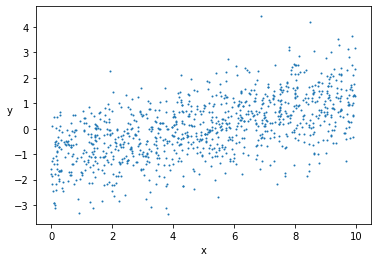

In [51]:
plt.scatter(X, y, s=1)
plt.ylabel('y', rotation=0)
plt.xlabel('x')

### Fitting a Linear Regression model

Instantiating the Linear Regression model object and fitting the data:

In [52]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)
model

LinearRegression()

Display the model's intercept and slope (coef_) values:

In [53]:
print(model.intercept_)
print(model.coef_)

-1.1612566002825888
[0.24002588]


The values are close to the slope and intercept of the synthetic data, but because of the random noise they are just approximations.

Let's predict the values against the same data used to train the model:

In [54]:
y_pred = model.predict(X.reshape(-1, 1))

Visualizing the results:

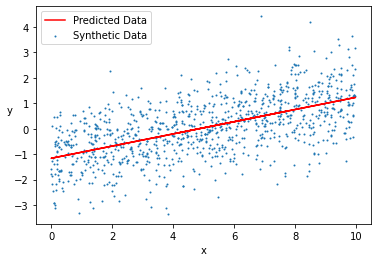

In [55]:
plt.scatter(X, y, s=1, label='Synthetic Data')
plt.plot(X, y_pred, c='r', label='Predicted Data')
plt.ylabel('y', rotation=0)
plt.xlabel('x')
plt.legend()

### Model Performance

Let's split the data into train and test sets:

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    df.education.values.reshape(-1, 1),
    df.default_payment_next_month.values,
    test_size=0.2,
    random_state=24)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


Verify whether the train and test sets are similar in terms of response variable:

In [57]:
print('Train set: {}'.format(np.mean(y_train)))
print('Test set: {}'.format(np.mean(y_test)))

Train set: 0.223102526838873
Test set: 0.21657603600225014


Since both train and test sets have a positive class fraction of 22%, and the overall data has also this percentage, we can say that these sets are representative.

### Classification Accuracy

Let's train and predict a Logistic Regression model into the data:

In [58]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='auto',
                           n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
                           tol=0.0001, verbose=0, warm_start=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Let's see the proportion of samples that were correctly classified (accuracy):

In [59]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [60]:
model.score(X_test, y_test)

0.7834239639977498

In [61]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

While a percentage of 78% might appear a good signal, when we compare to a null model (a model that guesses only one class) we result with the same value (the positive class proportion is around 22%, so a model that only guesses 0 will have the same accuracy). Therefore, other metrics are necessary to evaluate the goodnesss of the model.

### Confusion Matrix

Considering the two possible labels in binary classificatoin (Positive and Negative), we can derive the following metrics from a model prediction:

$TPR = \frac{TP}{P}$: positive samples predicted as positive (recall or sensitivity)

$FNR = \frac{FN}{P}$: negative samples predicted as positive

$TNR = \frac{TN}{N}$: negative samples predicted as negative

$FPR = \frac{FP}{N}$: positive samples predicted as negative

These metrics are combined into a 2x2 matrix where the true classes are along the diagonals. Besides, such relationship also holds:

$TPR + FNR = 1$ and $TNR + FPR = 1$

Let's see the resultant confusion matrix for the education logistic regression model:

In [62]:
P = sum(y_test)
N = sum(y_test == 0)

TP = sum((y_pred == 1) & (y_test == 1))
FP = sum((y_pred == 1) & (y_test == 0))
TN = sum((y_pred == 0) & (y_test == 0))
FN = sum((y_pred == 0) & (y_test == 1))

TPR = TP / P
FNR = FN / P
TNR = TN / N
FPR = FP / N

print('Positive samples: {}'.format(P))
print('Negative samples: {}'.format(N))
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

Positive samples: 1155
Negative samples: 4178
The true negative rate is 1.0 and the false positive rate is 0.0


In [63]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

On the testing set the model acted as a null model - every positive samples was predicted to be negative, so none of them were predited correctly.

### Understanding the Logistic Regression model

Let's analyze the predicted probability of the model:

In [64]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.77456295, 0.22543705],
       [0.77456295, 0.22543705],
       [0.79016179, 0.20983821],
       ...,
       [0.79016179, 0.20983821],
       [0.79016179, 0.20983821],
       [0.79016179, 0.20983821]])

As this array calculates probabilities for each class (0 as negative and 1 as positive), each row vector sums to one:

In [65]:
np.sum(y_pred_proba, axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

The array should contain all records:

In [66]:
np.sum(y_pred_proba, axis=1).shape

(5333,)

The sum shouldn't be different than one:

In [67]:
np.unique(np.sum(y_pred_proba, axis=1))

array([1.])

Let's isolate just the positive column from the probabilities and see its histogram distribution:

Text(0.5, 0, 'Predicted probability of positive class for the test set')

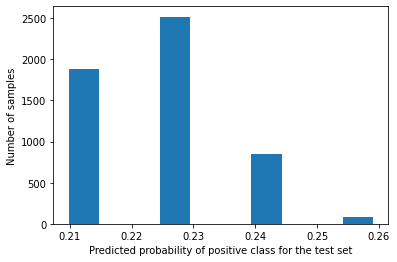

In [68]:
pos_proba = y_pred_proba[:, 1]

plt.hist(pos_proba)
plt.ylabel('Number of samples')
plt.xlabel('Predicted probability of positive class for the test set')

In [69]:
np.histogram(pos_proba)

(array([1883,    0,    0, 2519,    0,    0,  849,    0,    0,   82]),
 array([0.20983821, 0.21475824, 0.21967826, 0.22459829, 0.22951831,
        0.23443834, 0.23935837, 0.24427839, 0.24919842, 0.25411844,
        0.25903847]))

Let's see how many labels are actually positive plotting them with the model positive probabilities:

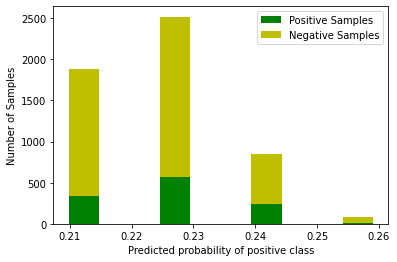

In [70]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked', color=['g', 'y'])
plt.ylabel('Number of Samples')
plt.xlabel('Predicted probability of positive class')
plt.legend(['Positive Samples', 'Negative Samples'])

The positive predicted probabilities for all samples are lower than 0.27 (or 27%). One way to try to enhance model is to change the threshold of positive classification (defaults to 0.5). As it is possible to see from the previous stacked histogram, lowering the threshold wouldn't help too much, as it would increase the false positive rate (FPR - the negative samples classified as positive) and, therefore, decrease the accuracy of the model.

### The Receiver Operating Characteristic (ROC) curve

This curve plots the pairs of true positive rates (y-axis) and false positive rates (x-axis) that result from lowering the threshold down from 1 to 0. In one hand, if threshold is 1 there will be no positive classes. On the other hand, with the threshold equals 0, all the samples will be classified as positive. A good classifier will show high TPR and low FPR.

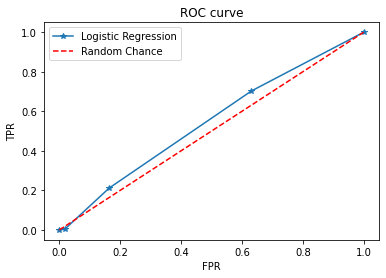

In [71]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC curve')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(['Logistic Regression', 'Random Chance'])

In [72]:
thresholds

array([1.25903847, 0.25903847, 0.24184056, 0.22543705, 0.20983821])

With a threshold of 1 there are no positive classifications, thus the roc value point of (0, 0). With the threshold value of about 0.25 the true positive rate increases a litte, as well as for the false positive rate. Lowering a little more the threshold this effect continues, so both TRP and FPR increases. Generally speaking, this model did not perform well.

The area under the curve (AUC) is similar to a random chance curve (taking the integral the random curve gives 0.5). So this classifier could just be a little better than a random classifier.

In [73]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

As stated previously, the AUC for the logistic regression model is pretty close to 0.5, meaning it's not a very effective classifier. 

### Precision

The precision looks at the ratio of the number of true positives to the sum of true and false positives. This metric measures the ratio of positive samples that were correctly predicted by the model.

> $precision = \frac{TP}{TP + FP}$

Precision is often used when the classes are very imbalanced and is more focused on getting good model performance in the sense of correctness of positive predictions.

### Performing Logistic Regression on a new feature: limit_bal (the account's credit limit)

Splitting into train and test sets:

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    df.limit_bal.values.reshape(-1, 1),
    df.default_payment_next_month.values,
    test_size=0.2,
    random_state=24)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


Training and predicting the model:

In [75]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

Evaluating the model:

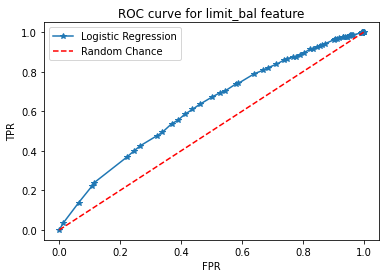

In [76]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:, 1])

plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC curve for limit_bal feature')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(['Logistic Regression', 'Random Chance'])

This curve is a better ROC cuver than for the **education ROC curve** as it was a bit further from the **random chance curve**. The number of pairs (FPR, TPR) is a smoother over the range of thresholds, reflecting that this feature has a larger number of distinct values.

Let's see the thresholds and the ROC AUC score:

In [77]:
thresholds

array([1.48298465, 0.48298465, 0.46600867, 0.44911106, 0.4323301 ,
       0.415703  , 0.3992656 , 0.38305207, 0.3670946 , 0.35142324,
       0.33606566, 0.321047  , 0.30638978, 0.29211383, 0.27823623,
       0.26477132, 0.25173076, 0.23912359, 0.2269563 , 0.21523299,
       0.20395547, 0.19312344, 0.18273464, 0.17278502, 0.16326891,
       0.15417922, 0.14550758, 0.13724452, 0.12937966, 0.12190182,
       0.11479918, 0.10805946, 0.10166997, 0.09561779, 0.08988983,
       0.08447295, 0.07935404, 0.07452008, 0.0699582 , 0.06565578,
       0.06160044, 0.05778008, 0.05418298, 0.05079775, 0.04761337,
       0.04461922, 0.0418051 , 0.03916119, 0.03667808, 0.0343468 ,
       0.03215875, 0.03010574, 0.02817998, 0.02637405, 0.02468092,
       0.0230939 , 0.02021324, 0.01890793, 0.01654057, 0.01546869,
       0.01446524, 0.01033455, 0.00844134, 0.0078901 , 0.00644178])

In [78]:
metrics.roc_auc_score(y_test, y_pred_proba[:,1])

0.6201990844642832

The ROC AUC is higher for *limit_bal* compared to education feature. This happened because the **limit_bal** feature may be more correlated to the account's finacial status (credit limit), instead of **education**, that may be less directly related to finances in this case.

Let's calculate the data for a **precision-recall curve** on the testing data:

Text(0.5, 0, 'Recall')

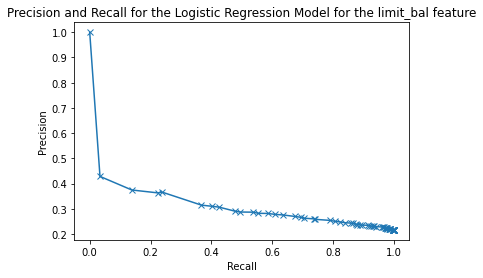

In [79]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba[:,1])

plt.plot(recall, precision, '-x')
plt.title('Precision and Recall for the Logistic Regression Model for the limit_bal feature')
plt.ylabel('Precision')
plt.xlabel('Recall')

The **precision-recall curve** showed that the precision is fairly low for this model for nearly all threshold values. This means that the portion of positive classifications that were correct is less than half (below 0.5).

Let's calculate the area under the curve:

In [80]:
metrics.auc(recall, precision)

0.31566964427378624

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to low false negative rate. Therefore, this model didn't show a good precision. The recall is nearly one for low threshold values, meaning that the model was capable to identify relevant samples (the model correctly identified the true positve samples among all the true positive and false negative samples).

Let's calcuate the ROC AUC curve for the training data to compare the **training and testing scores**:

In [81]:
y_train_pred_proba = model.predict_proba(X_train)

metrics.roc_auc_score(y_train, y_train_pred_proba[:,1])

0.6182918113358344

The difference between test and train ROC AUC is not quantitatively significant, in fact, the values were almost the same. The train ROC AUC showed data was correctly classified for almost 62%, resulting from the model "learning process". If these two values were different (generally the training ROC AUC being higher than the test) this would mean that the model didn't have a good generalization capability.